In [2]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [3]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_date = '2017_11_17'
exp_names = [
    '2017_11_17_17_30_12_temperature', # 0 ms
    '2017_11_17_17_48_39_temperature-0_5ms',
    '2017_11_17_17_04_39_mz-readout_temperature-1ms',
    '2017_11_17_16_14_53_mz-readout_temperature-2ms',
    '2017_11_17_15_25_34_mz-readout_temperature' # 3 ms
]

cuts = [[16],[5]]

q = qdp.QDP(base_data_path=dp)
for exp_name in exp_names:
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
    q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined
name 'fort_exp' is not defined
name 'fort_exp' is not defined
name 'fort_exp' is not defined
name 'fort_exp' is not defined


In [4]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [5]:
retention = q.apply_thresholds()

In [6]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.985 +- 0.007
ivar:	4.44	retention:0.970 +- 0.010
ivar:	8.89	retention:0.940 +- 0.014
ivar:	13.33	retention:0.905 +- 0.017
ivar:	17.78	retention:0.820 +- 0.023
ivar:	22.22	retention:0.721 +- 0.027
ivar:	26.67	retention:0.741 +- 0.026
ivar:	31.11	retention:0.610 +- 0.029
ivar:	35.56	retention:0.572 +- 0.029
ivar:	40.00	retention:0.470 +- 0.030
ivar:	0.00	retention:0.985 +- 0.007
ivar:	4.44	retention:0.915 +- 0.017
ivar:	8.89	retention:0.801 +- 0.024
ivar:	13.33	retention:0.725 +- 0.027
ivar:	17.78	retention:0.575 +- 0.029
ivar:	22.22	retention:0.485 +- 0.030
ivar:	26.67	retention:0.435 +- 0.029
ivar:	31.11	retention:0.353 +- 0.028
ivar:	35.56	retention:0.300 +- 0.027
ivar:	40.00	retention:0.290 +- 0.027
ivar:	0.00	retention:0.960 +- 0.012
ivar:	4.44	retention:0.920 +- 0.016
ivar:	8.89	retention:0.701 +- 0.027
ivar:	13.33	retention:0.615 +- 0.029
ivar:	17.78	retention:0.520 +- 0.030
ivar:	22.22	retention:0.380 +- 0.029
ivar:	26.67	retention:0.318 +- 0.028
ivar:	31.1

In [7]:
q.save_experiment_data(filename_prefix='mz_readout_heating_rate_data')

<IPython.core.display.Javascript object>


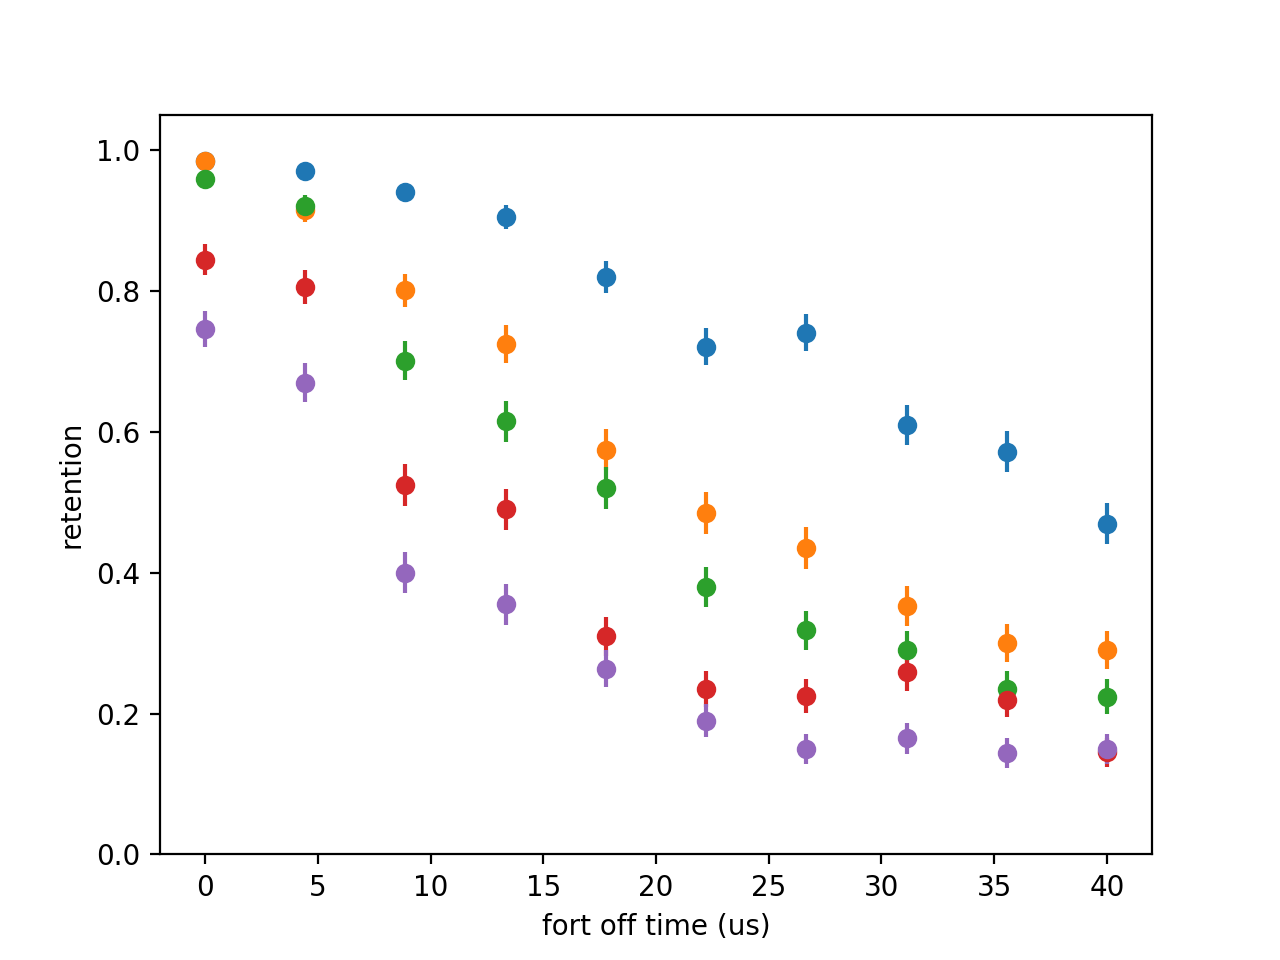

Text(0,0.5,u'retention')

In [9]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'o'
    )
ax.set_ylim(0, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

<IPython.core.display.Javascript object>


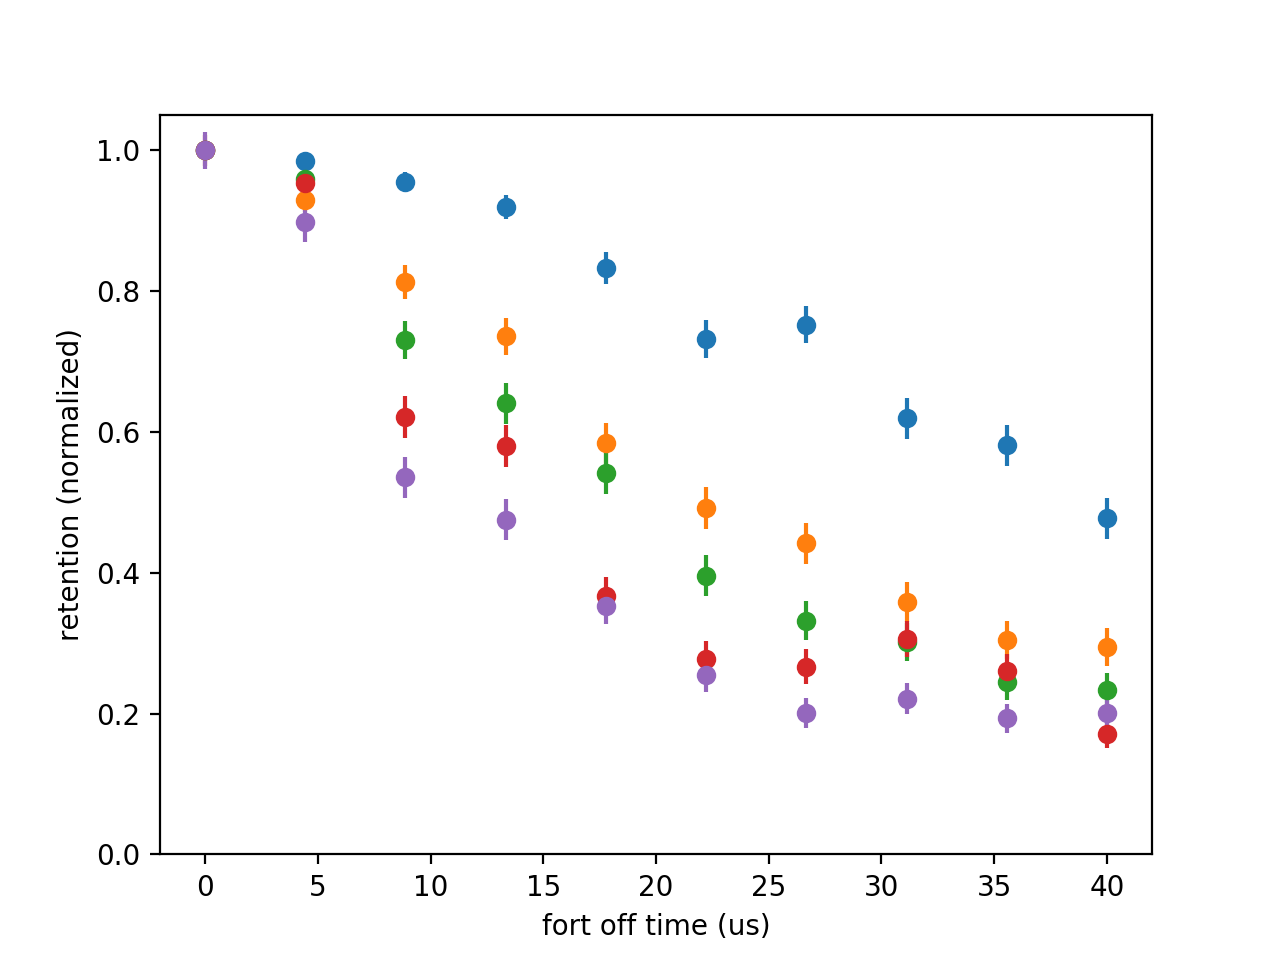

Text(0,0.5,u'retention (normalized)')

In [11]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e]/retention['retention'][e][0],
                yerr=retention['error'][e],
                fmt = 'o'
    )
ax.set_ylim(0, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention (normalized)')